In [1]:
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt

Jeg har 2 løsninger for dette potentiale. En indenfor potentialet og en udenfor

In [2]:
def solution(r: float, R: float, E: float, U: float, m: float) -> float:
    hbar = c.hbar.value
    if r >= R:
        kappa = np.sqrt(-2*m*E)/hbar
        output = np.exp(-kappa*r)
    elif r < R:
        kappa = np.sqrt(2*m*(U + E))/hbar
        output = np.sin(kappa*r)  # * A 
    else:
        print("error")
        output = 0
    return output

In [3]:
def solve_func(params) -> float:
    r, R, E, U, m = params
    hbar = c.hbar.value
    kappa1 = np.sqrt(-2*m*E)/hbar
    output1 = np.exp(-kappa1*r)
    kappa2 = np.sqrt(2*m*(U + E))/hbar
    output2 = np.sin(kappa2*r)  # * A 
    tot_output = output1 - output2
    return tot_output

In [4]:
U = 10
E = -2
R = 1.7e-15
m = c.m_e.value

In [5]:
rs = np.linspace(0, 4e-15, 1000)

In [6]:
ys = [solution(r, R, E, U, m) for r in rs]

In [7]:
kx = c.m_e.value

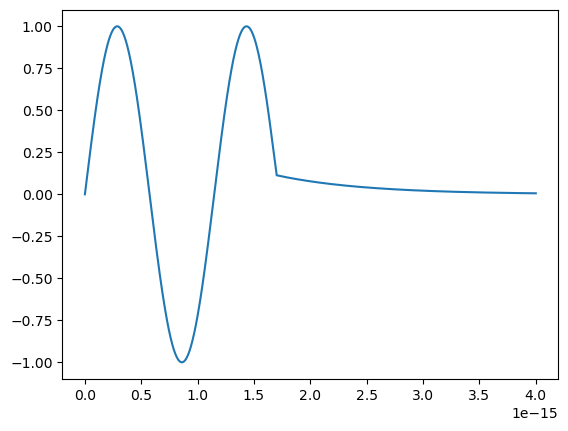

In [8]:
ys = [solution(r, R=R, E=-1e-8, U=1.93117685e-07, m=kx) for r in rs]
plt.plot(rs, ys)
plt.show()

In [9]:
import numpy as np
from scipy.optimize import fsolve
import scipy.constants as c

def solve_func(U):
    r, R, E, m = (1.7e-15, 1.7e-15, -1e-8, kx)
    hbar = c.hbar
    kappa1 = np.sqrt(-2 * m * E) / hbar
    output1 = np.exp(-kappa1 * r)
    kappa2 = np.sqrt(2 * m * (U + E)) / hbar
    output2 = np.sin(kappa2 * r)  # * A
    tot_output = output1 - output2
    return tot_output

# Specify initial guess for the parameters r, R, E, U, and m
initial_guess = (1, 2, 3, 4, 5)  # Adjust the values as needed

constants_solution = fsolve(solve_func, 2e-7)
print("Solution:", constants_solution)


Solution: [1.93117685e-07]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
r_start = 0
r_end = 4e-15  # 4 fm
dr = 0.01e-15
N = int((r_end - r_start) / dr) + 1

# Initialize arrays
r = np.linspace(r_start, r_end, N)
x = np.zeros(N)
v = np.zeros(N)  # Velocity, x'

# Initial conditions
x[0] = 0
v[0] = 0

# Finite difference method to solve the differential equation
for i in range(N - 1):
    x[i + 1] = x[i] + v[i] * dt
    v[i + 1] = v[i] + x[i] * dt

# Plot the solution
plt.plot(r, x, label='Position (x)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Solution of x\'\' = x')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'dt' is not defined

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

<ipython-input-11-7ffc148bb42b>:32: RuntimeWarning: overflow encountered in double_scalars
  psi[i] = (2 * psi[i-1] * (1 - (5/12) * dr**2 * radial_schrodinger_eq(r[i-1], psi, E)[i-1]) \
<ipython-input-11-7ffc148bb42b>:32: RuntimeWarning: invalid value encountered in double_scalars
  psi[i] = (2 * psi[i-1] * (1 - (5/12) * dr**2 * radial_schrodinger_eq(r[i-1], psi, E)[i-1]) \


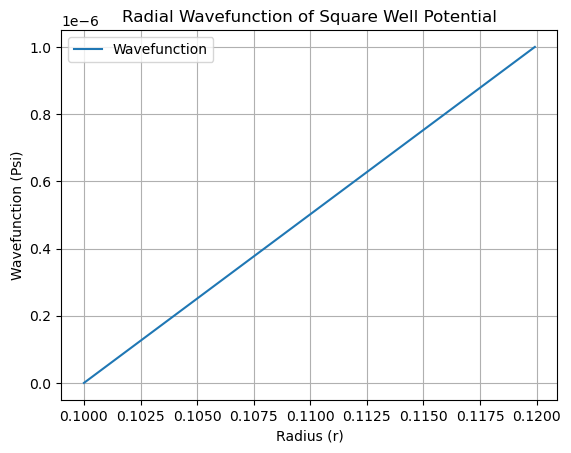

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
hbar = 1  # Reduced Planck's constant (set to 1 for simplicity)
m = 1     # Particle mass (set to 1 for simplicity)
L = 10    # Width of the square well potential
V0 = -20  # Depth of the square well potential

# Define the potential function for the square well
def potential(x):
    if abs(x) <= L / 2:
        return V0
    else:
        return 0

# Define the radial Schrödinger equation
def radial_schrodinger_eq(r, psi, E):
    # Define the radial wavefunction derivatives
    psi_prev = np.roll(psi, 1)
    psi_next = np.roll(psi, -1)

    # Calculate the radial wavefunction second derivative using finite differences
    d2_psi = (psi_next - 2 * psi + psi_prev) / dr**2

    # Calculate the radial Schrödinger equation
    return (2 * m / hbar**2) * (potential(r) - E) * psi - d2_psi

# Define the Numerov method
def numerov(psi, E):
    for i in range(2, N):
        psi[i] = (2 * psi[i-1] * (1 - (5/12) * dr**2 * radial_schrodinger_eq(r[i-1], psi, E)[i-1]) \
                - psi[i-2] * (1 + (1/12) * dr**2 * radial_schrodinger_eq(r[i-2], psi, E)[i-2])) \
                / (1 + (1/12) * dr**2 * radial_schrodinger_eq(r[i], psi, E)[i])

# Define the radial grid
N = 1000    # Number of radial grid points
r_min = 0.1 # Minimum radial distance
r_max = 20  # Maximum radial distance
dr = (r_max - r_min) / N
r = np.linspace(r_min, r_max, N)

# Define initial guess for the wavefunction
psi = np.zeros(N)

# Set boundary conditions
psi[0] = 0
psi[1] = 1e-6

# Define the energy range for scanning
E_min = -15
E_max = 0
num_points = 100
E_values = np.linspace(E_min, E_max, num_points)

# Iterate over energy values and solve the Schrödinger equation
for E in E_values:
    numerov(psi, E)
    
    # Check if wavefunction vanishes at large distances
    if psi[-1] * psi[-2] < 0:
        print("Found Eigenvalue:", E)
        break

# Plot the wavefunction
plt.plot(r, psi, label='Wavefunction')
plt.xlabel('Radius (r)')
plt.ylabel('Wavefunction (Psi)')
plt.title('Radial Wavefunction of Square Well Potential')
plt.grid(True)
plt.legend()
plt.show()
